# Credal Networks

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://pyagrum.gitlab.io) |[ ![interactive online version](images/atbinder.svg)](https://mybinder.org/v2/gl/agrumery%2FaGrUM/forBinder?urlpath=%2Fdoc%2Ftree%2Fwrappers%2Fpyagrum%2Fdoc%2Fsphinx%2Fnotebooks%2F24-Models_credalNetworks.ipynb)

In [1]:
import matplotlib.pyplot as plt

import pyagrum as gum
import pyagrum.lib.notebook as gnb

gnb.configuration()

Library,Version
OS,posix [darwin]
Python,"3.14.0 (main, Oct 7 2025, 09:34:52) [Clang 17.0.0 (clang-1700.3.19.1)]"
IPython,9.6.0
Matplotlib,3.10.7
Numpy,2.3.4
pyDot,4.0.1
pyAgrum,2.3.0.9


## Credal Net from BN

In [2]:
bn = gum.fastBN("A->B[3]->C<-D<-A->E->F")
bn_min = gum.BayesNet(bn)
bn_max = gum.BayesNet(bn)
for n in bn.nodes():
  x = 0.4 * min(bn.cpt(n).min(), 1 - bn.cpt(n).max())
  bn_min.cpt(n).translate(-x)
  bn_max.cpt(n).translate(x)

cn = gum.CredalNet(bn_min, bn_max)
cn.intervalToCredal()
cn

(pyagrum.CredalNet@0xc46cbe400) 
A:Range([0,1])
<> : [[0.564403 , 0.435597] , [0.813316 , 0.186684]]

B:Range([0,2])
<A:0> : [[0.404503 , 0.381073 , 0.214425] , [0.404503 , 0.431208 , 0.164289] , [0.454634 , 0.431208 , 0.114158] , [0.50477 , 0.381072 , 0.114158] , [0.454634 , 0.330941 , 0.214425] , [0.50477 , 0.330941 , 0.164289]]
<A:1> : [[0.0752 , 0.489576 , 0.435224] , [0.0752 , 0.53971 , 0.38509] , [0.125334 , 0.53971 , 0.334956] , [0.175468 , 0.489575 , 0.334956] , [0.125335 , 0.439441 , 0.435224] , [0.175468 , 0.439441 , 0.385091]]

C:Range([0,1])
<B:0|D:0> : [[0.274878 , 0.725122] , [0.378155 , 0.621845]]
<B:1|D:0> : [[0.394721 , 0.605279] , [0.497997 , 0.502003]]
<B:2|D:0> : [[0.390519 , 0.609481] , [0.493797 , 0.506203]]
<B:0|D:1> : [[0.373125 , 0.626875] , [0.476401 , 0.523599]]
<B:1|D:1> : [[0.0774566 , 0.922543] , [0.180733 , 0.819267]]
<B:2|D:1> : [[0.566948 , 0.433052] , [0.670225 , 0.329775]]

D:Range([0,1])
<A:0> : [[0.169429 , 0.830571] , [0.395333 , 0.604667]]
<A:1> : [[0.192405 , 0.807595] , [0.41831 , 0.58169]]

E:Range([0,1])
<A:0> : [[0.487658 , 0.512342] , [0.594354 , 0.405646]]
<A:1> : [[0.813281 , 0.186719] , [0.919977 , 0.0800234]]

F:Range([0,1])
<E:0> : [[0.494737 , 0.505263] , [0.768817 , 0.231183]]
<E:1> : [[0.20556 , 0.79444] , [0.47964 , 0.52036]]

### inference on Credal Net

In [3]:
gnb.flow.row(
  bn, bn.cpt("B"), cn, bn_min.cpt("B"), bn_max.cpt("B"), captions=["Bayes Net", "CPT", "Credal Net", "CPTmin", "CPTmax"]
)

### Binarization

We can use LBP on CN (L2U) only for binary credal networks (here B is not binary). We then propose the classical binarization (but warn the user that this leads to approximation in the inference)

In [4]:
cn2 = gum.CredalNet(bn_min, bn_max)
cn2.intervalToCredal()
cn2.approximatedBinarization()
cn2.computeBinaryCPTMinMax()

gnb.flow.row(cn, cn2, captions=["Credal net", "Binarized credal net"])

Here, $B$ becomes 
- $B$-b$i$ : the $i$-th bit of B
- instrumental $B$-v$k$ : the indicator variable for each modality $k$ of $B$

In [5]:
ie_mc = gum.CNMonteCarloSampling(cn)
ie2_lbp = gum.CNLoopyPropagation(cn2)
ie2_mc = gum.CNMonteCarloSampling(cn2)

In [6]:
gnb.sideBySide(
  gnb.getInference(cn, engine=ie_mc), gnb.getInference(cn2, engine=ie2_mc), gnb.getInference(cn2, engine=ie2_lbp)
)

In [7]:
gnb.sideBySide(
  ie_mc.CN(),
  ie_mc.marginalMin("F"),
  ie_mc.marginalMax("F"),
  ie_mc.CN(),
  ie2_lbp.marginalMin("F"),
  ie2_lbp.marginalMax("F"),
  ncols=3,
)
print(cn)


A:Range([0,1])
<> : [[0.564403 , 0.435597] , [0.813316 , 0.186684]]

B:Range([0,2])
<A:0> : [[0.404503 , 0.381073 , 0.214425] , [0.404503 , 0.431208 , 0.164289] , [0.454634 , 0.431208 , 0.114158] , [0.50477 , 0.381072 , 0.114158] , [0.454634 , 0.330941 , 0.214425] , [0.50477 , 0.330941 , 0.164289]]
<A:1> : [[0.0752 , 0.489576 , 0.435224] , [0.0752 , 0.53971 , 0.38509] , [0.125334 , 0.53971 , 0.334956] , [0.175468 , 0.489575 , 0.334956] , [0.125335 , 0.439441 , 0.435224] , [0.175468 , 0.439441 , 0.385091]]

C:Range([0,1])
<B:0|D:0> : [[0.274878 , 0.725122] , [0.378155 , 0.621845]]
<B:1|D:0> : [[0.394721 , 0.605279] , [0.497997 , 0.502003]]
<B:2|D:0> : [[0.390519 , 0.609481] , [0.493797 , 0.506203]]
<B:0|D:1> : [[0.373125 , 0.626875] , [0.476401 , 0.523599]]
<B:1|D:1> : [[0.0774566 , 0.922543] , [0.180733 , 0.819267]]
<B:2|D:1> : [[0.566948 , 0.433052] , [0.670225 , 0.329775]]

D:Range([0,1])
<A:0> : [[0.169429 , 0.830571] , [0.395333 , 0.604667]]
<A:1> : [[0.192405 , 0.807595] , [0.418

## Credal Net from bif files

In [8]:
cn = gum.CredalNet("res/cn/2Umin.bif", "res/cn/2Umax.bif")
cn.intervalToCredal()

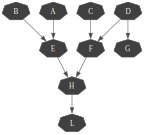

In [9]:
gnb.showCN(cn, "2")

In [10]:
ie = gum.CNMonteCarloSampling(cn)
ie.insertEvidenceFile("res/cn/L2U.evi")

In [11]:
ie.setRepetitiveInd(False)
ie.setMaxTime(1)
ie.setMaxIter(1000)

ie.makeInference()

In [12]:
cn

(pyagrum.CredalNet@0xc46cc2000) 
A:Labelized({0|1})
<> : [[0.6 , 0.4] , [0.7 , 0.3]]

B:Labelized({0|1})
<> : [[0.6 , 0.4] , [0.8 , 0.2]]

C:Labelized({0|1})
<> : [[0 , 1] , [0.1 , 0.9]]

D:Labelized({0|1})
<> : [[0.1 , 0.9] , [0.5 , 0.5]]

E:Labelized({0|1})
<A:0|B:0> : [[0.3 , 0.7] , [0.4 , 0.6]]
<A:1|B:0> : [[0.8 , 0.2] , [1 , 0]]
<A:0|B:1> : [[0.7 , 0.3] , [0.9 , 0.1]]
<A:1|B:1> : [[0.5 , 0.5] , [0.7 , 0.3]]

F:Labelized({0|1})
<C:0|D:0> : [[0.1 , 0.9] , [0.2 , 0.8]]
<C:1|D:0> : [[0.5 , 0.5]]
<C:0|D:1> : [[0.3 , 0.7] , [0.5 , 0.5]]
<C:1|D:1> : [[0.6 , 0.4] , [0.9 , 0.1]]

G:Labelized({0|1})
<D:0> : [[0.6 , 0.4] , [0.8 , 0.2]]
<D:1> : [[0.2 , 0.8] , [0.3 , 0.7]]

H:Labelized({0|1})
<E:0|F:0> : [[0 , 1] , [0.1 , 0.9]]
<E:1|F:0> : [[0.6 , 0.4] , [0.8 , 0.2]]
<E:0|F:1> : [[0.2 , 0.8] , [0.4 , 0.6]]
<E:1|F:1> : [[0.8 , 0.2] , [0.9 , 0.1]]

L:Labelized({0|1})
<H:0> : [[0.8 , 0.2] , [1 , 0]]
<H:1> : [[0.5 , 0.5] , [0.6 , 0.4]]

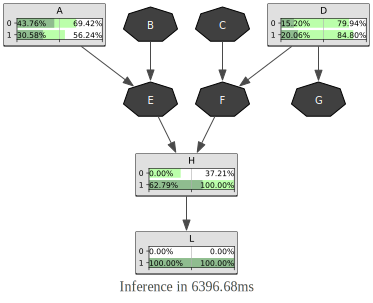

In [13]:
gnb.showInference(cn, targets={"A", "H", "L", "D"}, engine=ie, evs={"L": [0, 1], "G": [1, 0]})

## Comparing inference in credal networks

In [14]:
import pyagrum as gum


def showDiffInference(model, mc, lbp):
  for i in model.current_bn().nodes():
    a, b = mc.marginalMin(i)[:]
    c, d = mc.marginalMax(i)[:]

    e, f = lbp.marginalMin(i)[:]
    g, h = lbp.marginalMax(i)[:]

    plt.scatter([a, b, c, d], [e, f, g, h])


cn = gum.CredalNet("res/cn/2Umin.bif", "res/cn/2Umax.bif")
cn.intervalToCredal()

### Inference with no evidence

The two inference give quite the same result

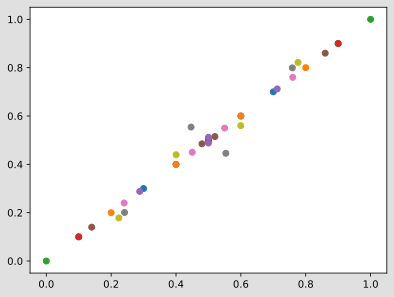

In [15]:
ie_mc = gum.CNMonteCarloSampling(cn)
ie_mc.makeInference()

cn.computeBinaryCPTMinMax()
ie_lbp = gum.CNLoopyPropagation(cn)
ie_lbp.makeInference()

showDiffInference(cn, ie_mc, ie_lbp)

#### The problem of evidence

When evidence are inserted, there are some divergence.

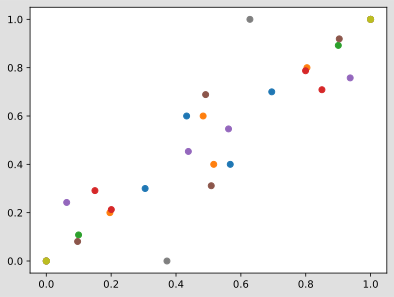

In [16]:
ie_mc = gum.CNMonteCarloSampling(cn)
ie_mc.insertEvidenceFile("res/cn/L2U.evi")
ie_mc.makeInference()

ie_lbp = gum.CNLoopyPropagation(cn)
ie_lbp.insertEvidenceFile("res/cn/L2U.evi")
ie_lbp.makeInference()

showDiffInference(cn, ie_mc, ie_lbp)

## Dynamical Credal Net

In [17]:
cn = gum.CredalNet("res/cn/bn_c_8.bif", "res/cn/den_c_8.bif")
cn.bnToCredal(0.8, False)

In [18]:
ie = gum.CNMonteCarloSampling(cn)
ie.insertModalsFile("res/cn/modalities.modal")

ie.setRepetitiveInd(True)
ie.setMaxTime(5)
ie.setMaxIter(1000)

ie.makeInference()

In [19]:
print(ie.dynamicExpMax("temp"))

(14.20340464862347, 11.911090684366485, 12.0406461626149, 12.031555584857191, 12.003107180947513, 12.008870898650432, 12.007860641421736, 12.007682925808101, 12.007727248106775)


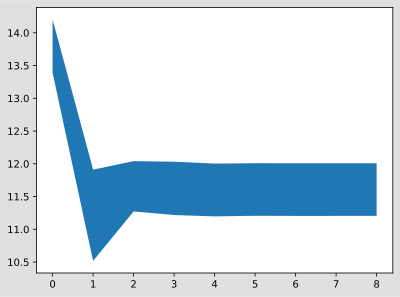

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill_between(range(9), ie.dynamicExpMax("temp"), ie.dynamicExpMin("temp"))
plt.show()

In [22]:
ie = gum.CNMonteCarloSampling(cn)
ie.insertModalsFile("res/cn/modalities.modal")

ie.setRepetitiveInd(False)
ie.setMaxTime(5)
ie.setMaxIter(1000)

ie.makeInference()
print(ie.messageApproximationScheme())

stopped with epsilon=0


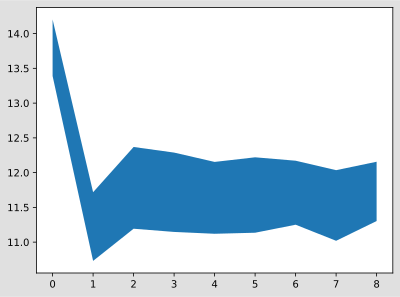

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill_between(range(9), ie.dynamicExpMax("temp"), ie.dynamicExpMin("temp"))
plt.show()

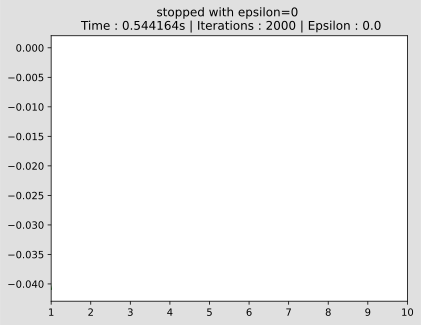

In [24]:
ie = gum.CNMonteCarloSampling(cn)
ie.insertModalsFile("res/cn/modalities.modal")

ie.setRepetitiveInd(False)
ie.setMaxTime(5)
ie.setMaxIter(5000)

gnb.animApproximationScheme(ie)
ie.makeInference()

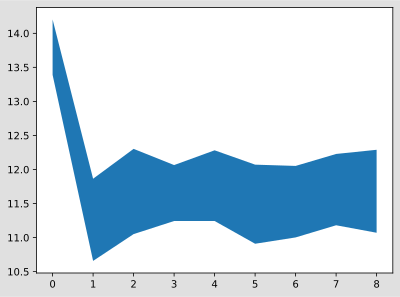

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill_between(range(9), ie.dynamicExpMax("temp"), ie.dynamicExpMin("temp"))
plt.show()